
# Name: Sumedh Badnore
GRIP - THE SPARKS FOUNDATION

July 2021

Linear Regression with Python Scikit Learn

#**Task 1 - Prediction using Supervised ML**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Also predict the percentage of the student if he/she studies 9.25 hrs/day.

# **STEP 1 : Importing All Required Libraries.**

In [6]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# **STEP 2 : Reading Data**

In [7]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **STEP 3 : Data Analysis.**

In [8]:
#Number of rows and columns in the data
data.shape

(25, 2)

In [9]:
#data type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#Summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

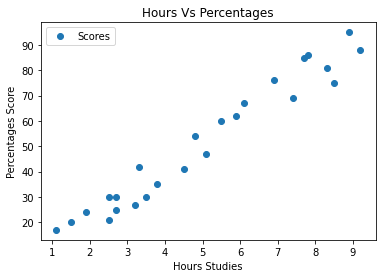

In [12]:
# Plotting the dataset
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentages')
plt.xlabel('Hours Studies')
plt.ylabel('Percentages Score')
plt.show()

In [13]:
# To see correlation between the two variables.
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Percentage and No. of Study hours are 98.07% correlated
# **STEP 4 : Preparing the Data.**
Divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# **STEP 5 : Training the Data.**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


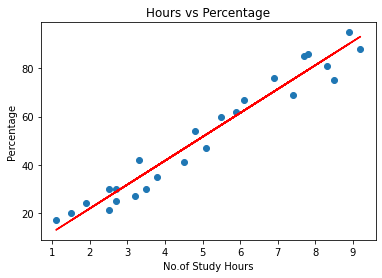

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color="red")
plt.title("Hours vs Percentage")
plt.xlabel("No.of Study Hours")
plt.ylabel("Percentage")
plt.show()

# **STEP 6 : Making Predictions.**

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# **STEP 7 : Comparing Actual vs Predicted Values.**

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# **STEP 8 : Evaluating the Model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print("R squared: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R squared:  0.9454906892105354
